## Observations and Insights 

In [3]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyData = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
studyData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Check the number of mice.
len(studyData["Mouse ID"].unique())


249

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = studyData[studyData.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupMouse = studyData.loc[studyData['Mouse ID'] == 'g989']
dupMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyData = studyData.drop(studyData[studyData['Mouse ID'] == 'g989'].index)

In [8]:
# Check the number of mice in the clean DataFrame.
len(studyData["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#create the groupby
studyGroup = studyData.groupby('Drug Regimen')

#perform each calculation
studyMean = studyGroup['Tumor Volume (mm3)'].mean()
studyMedian = studyGroup['Tumor Volume (mm3)'].median()
studyVar = studyGroup['Tumor Volume (mm3)'].var()
studyStd = studyGroup['Tumor Volume (mm3)'].std()
studySEM = studyGroup['Tumor Volume (mm3)'].sem()

#combine the series
summary = pd.concat([studyMean, studyMedian, studyVar, studyStd, studySEM], axis=1)

#rename the columns
summary.columns.values[0] = 'Mean'
summary.columns.values[1] = 'Median'
summary.columns.values[2] = 'Variance'
summary.columns.values[3] = 'Standard Deviation'
summary.columns.values[4] = 'SEM'

#print the dataframe
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary2 = studyData.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 
                                                                       'median', 
                                                                       'var', 
                                                                       'std', 
                                                                       'sem']})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

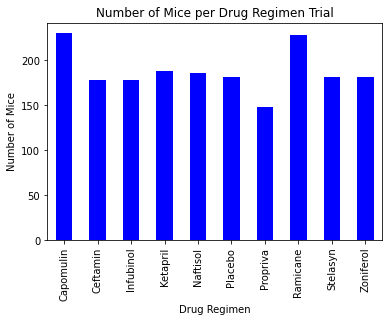

In [11]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

#create the series of data points per trial
# DrugGroup = uniqueMice.groupby(uniqueMice['Drug Regimen'])
# miceRegimen = DrugGroup['Mouse ID'].count()

DrugGroup = studyData.groupby(studyData['Drug Regimen'])
miceRegimen = DrugGroup['Mouse ID'].count()

miceRegimen.plot.bar('Drug Regimen', 'Mouse ID', rot=90, color='blue')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen Trial')
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

In [12]:
#convert MiceRegimen to a dataframe
miceRegimen_df = miceRegimen.to_frame()

#pull two lists for the pyplot graph out of the miceRegimen dataframe
x_axis = miceRegimen_df.index
y_axis = miceRegimen_df['Mouse ID'].to_list()
x_axis


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

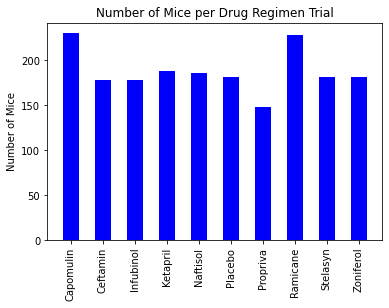

In [13]:

##  Note: this plot will be identical to the one that uses Pandas
plt.bar(x_axis, y_axis, color='blue', alpha=1, align='center', width = .5)
tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen Trial')
plt.show()

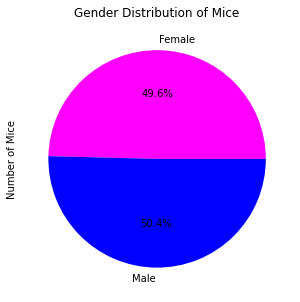

In [22]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

#create a dataframe with no duplicate mice
uniqueMice = studyData.drop_duplicates(subset=['Mouse ID'], keep = 'first')

#create the pie chart
colors = ['magenta', 'blue']
GenderGroup = uniqueMice.groupby(uniqueMice['Sex'])
mouseGender = GenderGroup['Mouse ID'].count()
mouseGender.plot.pie(y='Sex', figsize=(5,5), colors = colors, autopct='%.1f%%')
plt.ylabel('Number of Mice')
plt.title('Gender Distribution of Mice')
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

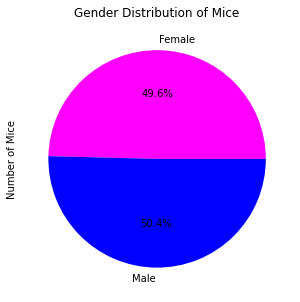

In [23]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

#convert mouseGender to a dataframe to allow for separating into lists
GenderDF = mouseGender.to_frame()

#pull labels from the dataframe index
labels = GenderDF.index

#pull a list of values from teh dataframe
values = GenderDF['Mouse ID'].to_list()

#create the pie plot

fig, ax1 = plt.subplots(figsize = (5,5)) 
plt.pie(values, labels=labels, colors=colors, autopct='%.1f%%', radius=1)

plt.ylabel('Number of Mice')
plt.title('Gender Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse

#keep only the maximum time stamp value for each Mouse ID
finalTumor = studyData.groupby(studyData['Mouse ID'])
finalTumor_series = finalTumor['Timepoint'].max()

# Merge this series (converted to df) with the original dataframe to get the tumor volume at the last timepoint. 
#Keep only information on the last timepoint for each Mouse ID.

finalVolume_df = pd.merge(finalTumor_series.to_frame(), 
                          studyData, 
                          how="left", 
                          left_on=['Mouse ID','Timepoint'], 
                          right_on=['Mouse ID','Timepoint'])
finalVolume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [ ]:
# Put the four drug regimens into a list
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create the list of final Capomulin volumes
CapomulinDF = finalVolume_df.loc[finalVolume_df['Drug Regimen'] == 'Capomulin']
#pull the list of final tumor volumes
CapomulinVol = CapomulinDF['Tumor Volume (mm3)']

#repeat the same steps for the remaining regimens

# Create the list of final Ramicane volumes
RamicaneDF = finalVolume_df.loc[finalVolume_df['Drug Regimen'] == 'Ramicane']
#pull the list of final tumor volumes
RamicaneVol = RamicaneDF['Tumor Volume (mm3)']

# Create the list of final Infubinol volumes
InfubinolDF = finalVolume_df.loc[finalVolume_df['Drug Regimen'] == 'Infubinol']
#pull the list of final tumor volumes
InfubinolVol = InfubinolDF['Tumor Volume (mm3)']

# Create the list of final Ceftamin volumes
CeftaminDF = finalVolume_df.loc[finalVolume_df['Drug Regimen'] == 'Ceftamin']
#pull the list of final tumor volumes
CeftaminVol = CeftaminDF['Tumor Volume (mm3)']
    
    

In [ ]:
#Calculate the quartiles, IQR, boundaries, and potential outliers for Capomulin
quartiles = CapomulinDF.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig = figure()
# ax = axes()
# hold(True)
fig1, ax1 = plt.subplots()
ax1.boxplot(CapomulinVol)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
#filter the data for Capomulin
Capomulin_df = studyData.loc[studyData['Drug Regimen'] == 'Capomulin']
# Capomulin_df

#choose a mouse ID at random
randomMouse = 'u364' #Capomulin_df['Mouse ID'].sample()

#create a dataframe for the randomly selected mouse
randomMouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == randomMouse]

# Create the lists of timepoints and tumor volumes
tumorVolume = randomMouse_df['Tumor Volume (mm3)']
timePoint = randomMouse_df['Timepoint']


plt.plot(timePoint, tumorVolume)
plt.xlabel('Time Point (Number of Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Mouse {randomMouse} Tumor Volume Over Time, Capomulin Regimen')
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

# Pull weight and tumor volume into lists for the correct axis
x_axis = Capomulin_df['Weight (g)']
y_axis = Capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volumes by Mouse Weight - Capomulin Regimen')

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volumes by Mouse Weight - Capomulin Regimen')
print(line_eq)
print(f"The correlation coeffecient is: {rvalue}")
plt.show()
